Autor: Time 18

Cicero 

Eric

# 1. Instalando e importando bibliotecas

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 10.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=847ab0944a554349d235d00277a83159ee0437272cbc1653cc6000d1a4bcf8c9
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [32]:
import yfinance as yf

In [1]:
!pip install investpy
import investpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
investpy.get_indices_list('brazil')

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

# 2. Importando dados

In [29]:
ativos = ['CMIG4.SA','CPFE3.SA', 'CPFE3.SA', 'ELET6.SA', 'NEOE3.SA', 'CPLE6.SA', 'ENBR3.SA', 'EGIE3.SA','TRPL4.SA','TAEE11.SA', 'EQTL3.SA']


In [30]:
inicio = '2021-01-01'
fim = '2021-09-15'

iniciobr = '01/01/2021'
fimbr = '12/09/2021'

In [33]:
df = pd.DataFrame()

for i in ativos: 
  df[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
precos = df

In [35]:
precos.head()

,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA
Date,,,,,,,,,,
2021-01-04,12.121451,28.360449,33.466846,17.398548,6.682806,18.571939,40.577351,25.545612,30.668737,22.095846
2021-01-05,12.121451,28.225485,32.505363,17.496513,6.582088,18.390203,40.214222,25.379850,30.724501,22.144407
2021-01-06,12.370053,28.216490,32.320465,17.418140,6.590254,18.351688,39.888340,25.223297,30.780258,21.668497
2021-01-07,12.232895,27.217754,31.710295,17.090494,6.418761,17.870270,39.553143,24.781269,29.878786,21.202301
2021-01-08,13.072995,28.270473,32.634792,17.884018,6.652863,18.640541,41.210499,25.766624,30.529331,21.862747


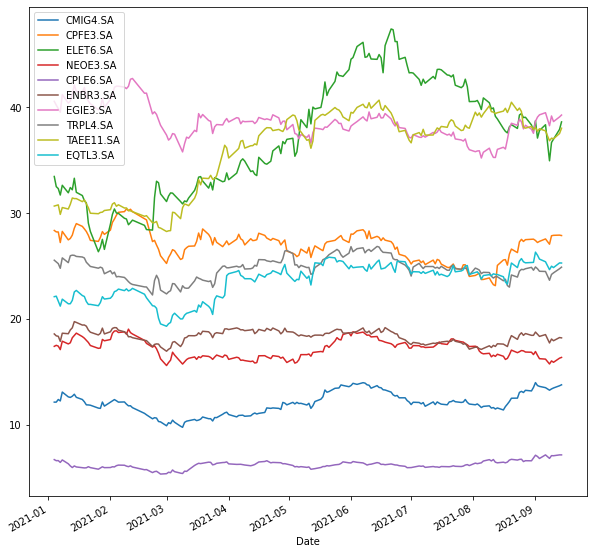

In [36]:
precos.plot(figsize = (10,10));

In [37]:
normalizado = precos/precos.iloc[0]

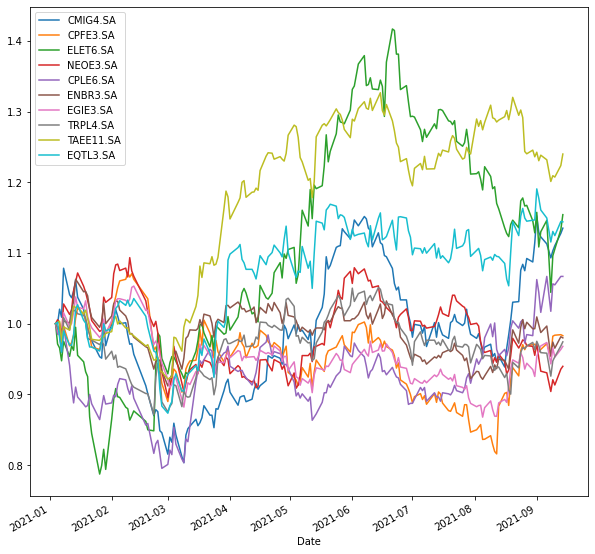

In [38]:
normalizado.plot(figsize = (10,10));

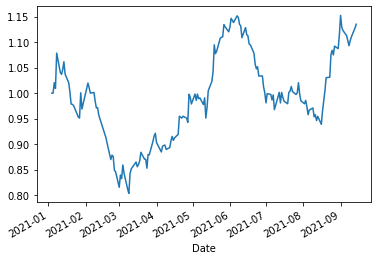

In [40]:
normalizado['CMIG4.SA'].plot();

# 3. Cálculo dos retornos

In [41]:
ativos_retornos = precos.pct_change()

In [42]:
ativos_retornos.head()

,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA
Date,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.000000,-0.004759,-0.028729,0.005631,-0.015071,-0.009786,-0.008949,-0.006489,0.001818,0.002198
2021-01-06,0.020509,-0.000319,-0.005688,-0.004479,0.001241,-0.002094,-0.008104,-0.006168,0.001815,-0.021491
2021-01-07,-0.011088,-0.035395,-0.018879,-0.018811,-0.026022,-0.026233,-0.008403,-0.017525,-0.029287,-0.021515
2021-01-08,0.068676,0.038678,0.029154,0.046431,0.036472,0.043104,0.041902,0.039762,0.021773,0.031150


In [43]:
ativos_retornos = ativos_retornos.dropna()

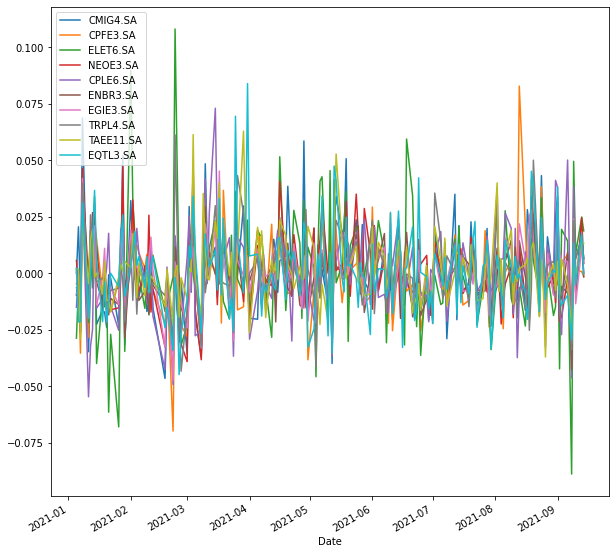

In [44]:
ativos_retornos.plot(figsize = (10,10));

# 4. Visualização de janela de volatilidade

In [45]:
vol_movel = ativos_retornos.rolling(window = 20).std()

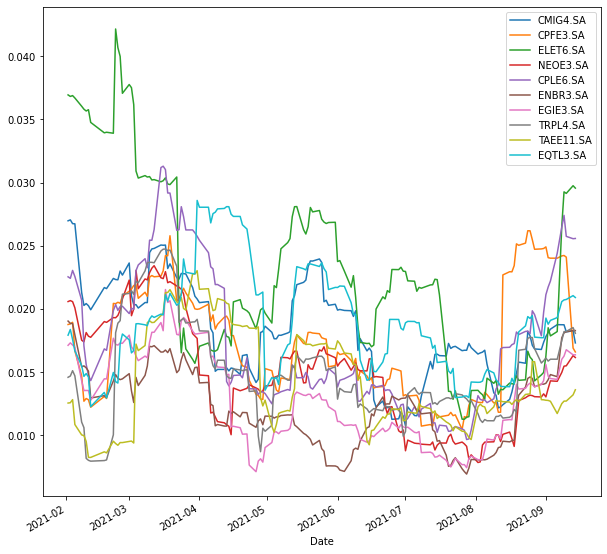

In [46]:
vol_movel.plot(figsize = (10,10));

# 5. Criando um DF consolidado com retorno vs. volatilidade

In [47]:
ativos_retornos.std()

CMIG4.SA     0.019379
CPFE3.SA     0.017772
ELET6.SA     0.024814
NEOE3.SA     0.015637
CPLE6.SA     0.019264
ENBR3.SA     0.013344
EGIE3.SA     0.013723
TRPL4.SA     0.015527
TAEE11.SA    0.014773
EQTL3.SA     0.019182
dtype: float64

In [48]:
volatilidade = pd.DataFrame(ativos_retornos.std(), columns= ['Vol'] )

In [49]:
retornos_medios = pd.DataFrame(ativos_retornos.mean(), columns= ['Returns'] )

In [50]:
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)

In [51]:
risco_retorno

,Returns,Vol
CMIG4.SA,0.000923,0.019379
CPFE3.SA,0.000057,0.017772
ELET6.SA,0.001139,0.024814
NEOE3.SA,-0.000240,0.015637
CPLE6.SA,0.000561,0.019264
ENBR3.SA,-0.000029,0.013344
EGIE3.SA,-0.000095,0.013723
TRPL4.SA,-0.000032,0.015527
TAEE11.SA,0.001359,0.014773
EQTL3.SA,0.000964,0.019182


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
risco_retorno.shape[0]

10

In [54]:
range(risco_retorno.shape[0])

range(0, 10)

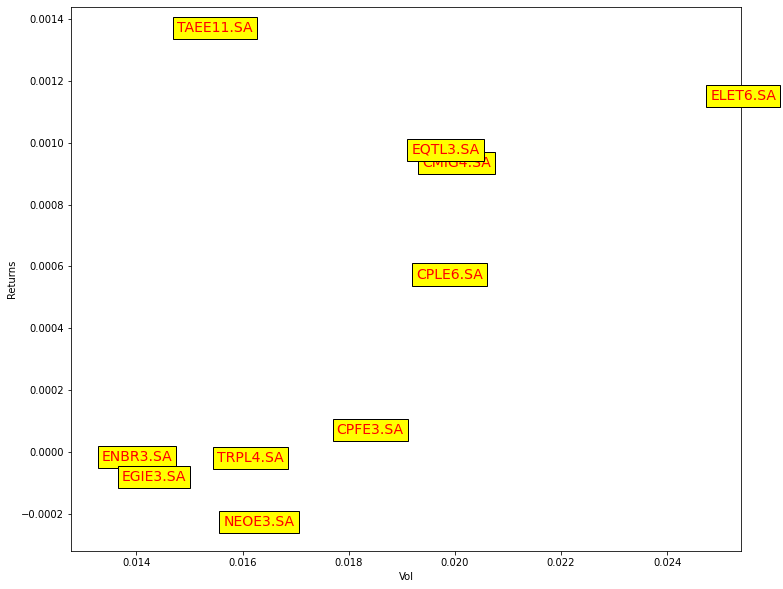

In [55]:
plt.subplots(figsize = (12,10))

sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Returns')

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Returns[i], s = risco_retorno.index[i],
           fontdict = dict(color = 'red', size = 14),
           bbox = dict(facecolor = 'yellow'))

## 6. Simulação de uma carteira vs. IBOV

In [56]:
primeira = precos.iloc[0]

In [57]:
#Investe 1mm em cada
comprados = round(1000000/primeira, 0)
comprados

CMIG4.SA      82498.0
CPFE3.SA      35260.0
ELET6.SA      29880.0
NEOE3.SA      57476.0
CPLE6.SA     149638.0
ENBR3.SA      53845.0
EGIE3.SA      24644.0
TRPL4.SA      39146.0
TAEE11.SA     32606.0
EQTL3.SA      45257.0
Name: 2021-01-04 00:00:00, dtype: float64

In [58]:
PL = precos*comprados

In [59]:
PL.tail()

,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA
Date,,,,,,,,,,
2021-09-08,1.093098e+06,954135.581169,1.044306e+06,904097.453690,1.017538e+06,954133.363028,943125.891281,925802.885067,1.201205e+06,1.115585e+06
2021-09-09,1.102998e+06,982343.621521,1.095998e+06,920765.546310,1.056444e+06,974056.058216,965798.326157,947333.229866,1.209357e+06,1.130520e+06
2021-09-10,1.110423e+06,983753.986549,1.105560e+06,913293.659733,1.054948e+06,965440.866432,952737.036240,953205.114933,1.207400e+06,1.124636e+06
2021-09-13,1.127748e+06,984459.202690,1.133050e+06,935709.319466,1.066919e+06,981594.325352,963580.362396,968472.031040,1.223703e+06,1.144550e+06
2021-09-14,1.135172e+06,983048.770409,1.154264e+06,939732.621925,1.066919e+06,979979.041080,968016.289917,974343.916107,1.240006e+06,1.144097e+06


In [60]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)

In [61]:
PL.head()

,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA,PL Total
Date,,,,,,,,,,,
2021-01-04,9.999955e+05,999989.426003,999989.372406,9.999990e+05,1.000002e+06,1.000006e+06,9.999882e+05,1.000009e+06,9.999849e+05,9.999917e+05,9.999954e+06
2021-01-05,9.999955e+05,995230.595741,971260.260315,1.005630e+06,9.849305e+05,9.902205e+05,9.910393e+05,9.935196e+05,1.001803e+06,1.002189e+06,9.935818e+06
2021-01-06,1.020505e+06,994913.430061,965735.496826,1.001125e+06,9.861525e+05,9.881467e+05,9.830083e+05,9.873912e+05,1.003621e+06,9.806512e+05,9.911249e+06
2021-01-07,1.009189e+06,959698.018875,947503.606339,9.822932e+05,9.604905e+05,9.622247e+05,9.747476e+05,9.700876e+05,9.742277e+05,9.595525e+05,9.700015e+06
2021-01-08,1.078496e+06,996816.894913,975127.594757,1.027902e+06,9.955211e+05,1.003700e+06,1.015592e+06,1.008660e+06,9.954394e+05,9.894423e+05,1.008670e+07


In [62]:
PL.tail()

,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA,PL Total
Date,,,,,,,,,,,
2021-09-08,1.093098e+06,954135.581169,1.044306e+06,904097.453690,1.017538e+06,954133.363028,943125.891281,925802.885067,1.201205e+06,1.115585e+06,1.015303e+07
2021-09-09,1.102998e+06,982343.621521,1.095998e+06,920765.546310,1.056444e+06,974056.058216,965798.326157,947333.229866,1.209357e+06,1.130520e+06,1.038561e+07
2021-09-10,1.110423e+06,983753.986549,1.105560e+06,913293.659733,1.054948e+06,965440.866432,952737.036240,953205.114933,1.207400e+06,1.124636e+06,1.037140e+07
2021-09-13,1.127748e+06,984459.202690,1.133050e+06,935709.319466,1.066919e+06,981594.325352,963580.362396,968472.031040,1.223703e+06,1.144550e+06,1.052978e+07
2021-09-14,1.135172e+06,983048.770409,1.154264e+06,939732.621925,1.066919e+06,979979.041080,968016.289917,974343.916107,1.240006e+06,1.144097e+06,1.058558e+07


In [63]:
iee = investpy.get_index_historical_data('Electrical Energy', country= 'brazil',from_date=iniciobr, to_date=fimbr)
iee

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-01-04,83184.65,83798.71,81642.99,81955.05,0,BRL
2021-01-05,81961.01,81961.01,80434.25,81558.40,0,BRL
2021-01-06,81511.53,81697.67,80160.83,80593.64,0,BRL
2021-01-07,80652.01,80902.71,79380.52,79577.18,0,BRL
2021-01-08,79742.14,82472.23,79585.81,82376.05,0,BRL
...,...,...,...,...,...,...
2021-09-03,80702.09,80802.85,79629.40,79980.68,0,BRL
2021-09-06,79912.37,80868.68,79678.72,80641.09,0,BRL
2021-09-08,80453.21,80453.21,77923.33,78157.77,0,BRL


In [64]:
iee.rename(columns = {'Close': 'IEE B3'}, inplace = True)
iee.head()

,Open,High,Low,IEE B3,Volume,Currency
Date,,,,,,
2021-01-04,83184.65,83798.71,81642.99,81955.05,0,BRL
2021-01-05,81961.01,81961.01,80434.25,81558.40,0,BRL
2021-01-06,81511.53,81697.67,80160.83,80593.64,0,BRL
2021-01-07,80652.01,80902.71,79380.52,79577.18,0,BRL
2021-01-08,79742.14,82472.23,79585.81,82376.05,0,BRL


In [65]:
iee = iee.drop(iee.columns[[0,1,2,4,5]], axis = 1)

In [66]:
iee

,IEE B3
Date,
2021-01-04,81955.05
2021-01-05,81558.40
2021-01-06,80593.64
2021-01-07,79577.18
2021-01-08,82376.05
...,...
2021-09-03,79980.68
2021-09-06,80641.09
2021-09-08,78157.77


In [67]:
PL.index = pd.to_datetime(PL.index)

In [68]:
novo_df = pd.merge(iee, PL, how = 'inner', on = 'Date')

In [69]:
novo_df.head()

,IEE B3,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA,PL Total
Date,,,,,,,,,,,,
2021-01-04,81955.05,9.999955e+05,999989.426003,999989.372406,9.999990e+05,1.000002e+06,1.000006e+06,9.999882e+05,1.000009e+06,9.999849e+05,9.999917e+05,9.999954e+06
2021-01-05,81558.40,9.999955e+05,995230.595741,971260.260315,1.005630e+06,9.849305e+05,9.902205e+05,9.910393e+05,9.935196e+05,1.001803e+06,1.002189e+06,9.935818e+06
2021-01-06,80593.64,1.020505e+06,994913.430061,965735.496826,1.001125e+06,9.861525e+05,9.881467e+05,9.830083e+05,9.873912e+05,1.003621e+06,9.806512e+05,9.911249e+06
2021-01-07,79577.18,1.009189e+06,959698.018875,947503.606339,9.822932e+05,9.604905e+05,9.622247e+05,9.747476e+05,9.700876e+05,9.742277e+05,9.595525e+05,9.700015e+06
2021-01-08,82376.05,1.078496e+06,996816.894913,975127.594757,1.027902e+06,9.955211e+05,1.003700e+06,1.015592e+06,1.008660e+06,9.954394e+05,9.894423e+05,1.008670e+07


In [70]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [71]:
PL_normalizado.head()

,IEE B3,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA,PL Total
Date,,,,,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,0.995160,1.000000,0.995241,0.971271,1.005631,0.984929,0.990214,0.991051,0.993511,1.001818,1.002198,0.993586
2021-01-06,0.983388,1.020509,0.994924,0.965746,1.001126,0.986151,0.988141,0.983020,0.987383,1.003636,0.980659,0.991129
2021-01-07,0.970986,1.009194,0.959708,0.947514,0.982294,0.960489,0.962219,0.974759,0.970079,0.974242,0.959560,0.970006
2021-01-08,1.005137,1.078501,0.996827,0.975138,1.027903,0.995519,1.003694,1.015603,1.008652,0.995454,0.989451,1.008674


In [72]:
PL_normalizado.tail()

,IEE B3,CMIG4.SA,CPFE3.SA,ELET6.SA,NEOE3.SA,CPLE6.SA,ENBR3.SA,EGIE3.SA,TRPL4.SA,TAEE11.SA,EQTL3.SA,PL Total
Date,,,,,,,,,,,,
2021-09-03,0.975909,1.122803,0.963666,1.130074,0.932836,1.016040,0.987511,0.968521,0.959069,1.238395,1.160852,1.047976
2021-09-06,0.983967,1.112903,0.971776,1.146209,0.930537,1.066917,0.996665,0.973449,0.958286,1.231873,1.149537,1.053815
2021-09-08,0.953666,1.093103,0.954146,1.044317,0.904098,1.017537,0.954128,0.943137,0.925795,1.201223,1.115594,1.015307
2021-09-09,0.973906,1.103003,0.982354,1.096010,0.920767,1.056442,0.974050,0.965810,0.947325,1.209375,1.130529,1.038566
2021-09-10,0.971690,1.110428,0.983764,1.105572,0.913295,1.054946,0.965435,0.952748,0.953197,1.207418,1.124646,1.037145


In [75]:
PL_normalizado.to_json('GraficoPLTotaleIndiceIEEB3Comparado.json')

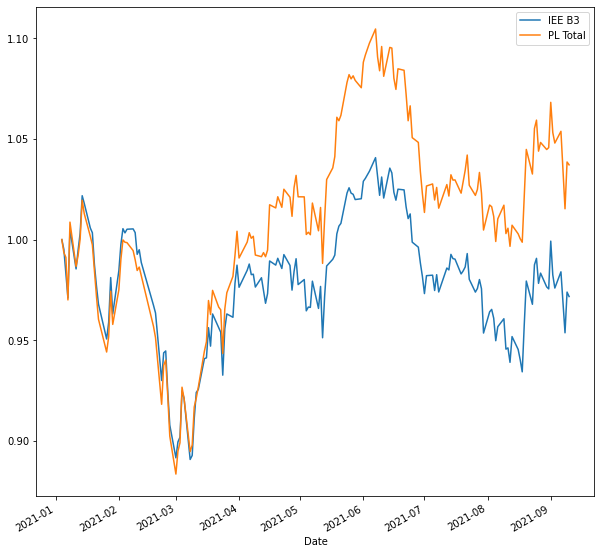

In [74]:
#Evidência legal. Normalizando, a carteira selecionada teve desempenho superior :)

PL_normalizado[['IEE B3', 'PL Total']].plot(figsize = (10,10));